# Podział na zdania

## Wprowadzenie

**Podział na zdania** jest drugim poziomem segmentacji tekstu. Dla przypomnienia, pierwszym poziomem była tokenizacja, czyli podział tekstu na segmenty odpowiadające słowom.

**Zastosowania**:
  * stylometria — np. średnia długość zdania w dokumencie,
  * analiza gramatyczna i składniowa zdań — np. parsery,
  * pogłębionej analize tekstu — niektóre metody mają ograniczenia na maksymalną długość sekwencji do przetworzenia. Wydzielenie zdań daje możliwość podziału dokumentu na mniejsze fragmenty zgodnie z naturalnymi granicami, a tym samym pozwala uniknąć dzielenia zdań "w połowie".

Podział dokumentu na zdania nie jest wymagany w każdym zadaniu NLP. Na przykład porównywanie treści dokumentów z wykorzystaniem metody bag-of-words nie wymaga podziału na zdania.




## Podział na zdania w spaCy

### Przygotowanie

*   Będziemy korzystać z modelu pl_core_news_sm
*   Model wymaga spaCy w wersji 2.3

In [1]:
!pip install spacy -U

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.3.4)


In [2]:
!python -m spacy download pl_core_news_sm
!python -m spacy link pl_core_news_sm pl_core_news_sm -f

✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pl_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pl_core_news_sm
You can now load the model via spacy.load('pl_core_news_sm')


In [3]:
import spacy
nlp = spacy.load('pl_core_news_sm')

### Iteracja po zdaniach

In [4]:
text = "Na polu stoi ul. W ulu mieszkają pszczoły. Pole jest przy ul. Wiśniowej."

docs = nlp(text)

In [5]:
for sent in docs.sents:
  print(sent.__class__)
  print(f"{sent.start:<2} {sent.end:<2} {sent.text}\n")

<class 'spacy.tokens.span.Span'>
0  5  Na polu stoi ul.

<class 'spacy.tokens.span.Span'>
5  10 W ulu mieszkają pszczoły.

<class 'spacy.tokens.span.Span'>
10 17 Pole jest przy ul. Wiśniowej.



In [6]:
for idx, t in enumerate(docs):
  print(f"{idx}) {t.text:<10} {t.is_sent_start} {t.is_sent_end}")

0) Na         True None
1) polu       None None
2) stoi       None None
3) ul         None None
4) .          None True
5) W          True None
6) ulu        None None
7) mieszkają  None None
8) pszczoły   None None
9) .          None True
10) Pole       True None
11) jest       None None
12) przy       None None
13) ul         None None
14) .          None None
15) Wiśniowej  None None
16) .          None True


### Podział na zdania, a potok przetwarzania

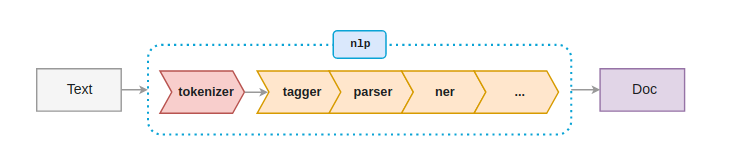

In [7]:
docs = nlp(text, disable=["parser"])

try:
  for sent in docs.sents:
    print(sent)
except ValueError as er:
  print(er)

[E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: nlp.add_pipe(nlp.create_pipe('sentencizer')) Alternatively, add the dependency parser, or set sentence boundaries by setting doc[i].is_sent_start.


### Domyślny moduł do podziału na zdania

In [8]:
from spacy.lang.pl import Polish

nlp2 = Polish()
sentencizer = nlp2.create_pipe("sentencizer")
nlp2.add_pipe(sentencizer)

print(nlp2.pipe_names)

['sentencizer']


In [9]:
for sent in nlp2(text).sents:
  print(sent)

Na polu stoi ul.
W ulu mieszkają pszczoły.
Pole jest przy ul.
Wiśniowej.


### Mały (sm) vs duży (lg) model

In [10]:
for sent in nlp("Wykład poprowadzi mgr inż. Jan Nowak. Początek o godz. 12:00.").sents:
  print(f"{sent.start:<2} {sent.end:<2} {sent.text}")

0  5  Wykład poprowadzi mgr inż.
5  8  Jan Nowak.
8  14 Początek o godz. 12:00.


In [11]:
!python -m spacy download pl_core_news_lg
!python -m spacy link pl_core_news_lg pl_core_news_lg -f
nlp_lg = spacy.load("pl_core_news_lg")

✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_lg')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pl_core_news_lg -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pl_core_news_lg
You can now load the model via spacy.load('pl_core_news_lg')


In [12]:
for sent in nlp_lg("Wykład poprowadzi mgr inż. Jan Nowak. Początek o godz. 12:00.").sents:
  print(f"{sent.start:<2} {sent.end:<2} {sent.text}")

0  8  Wykład poprowadzi mgr inż. Jan Nowak.
8  14 Początek o godz. 12:00.


## Jak sobie radzić z tekstem bez znaków interpunkcyjnych?

http://ws.clarin-pl.eu/punctuator.shtml

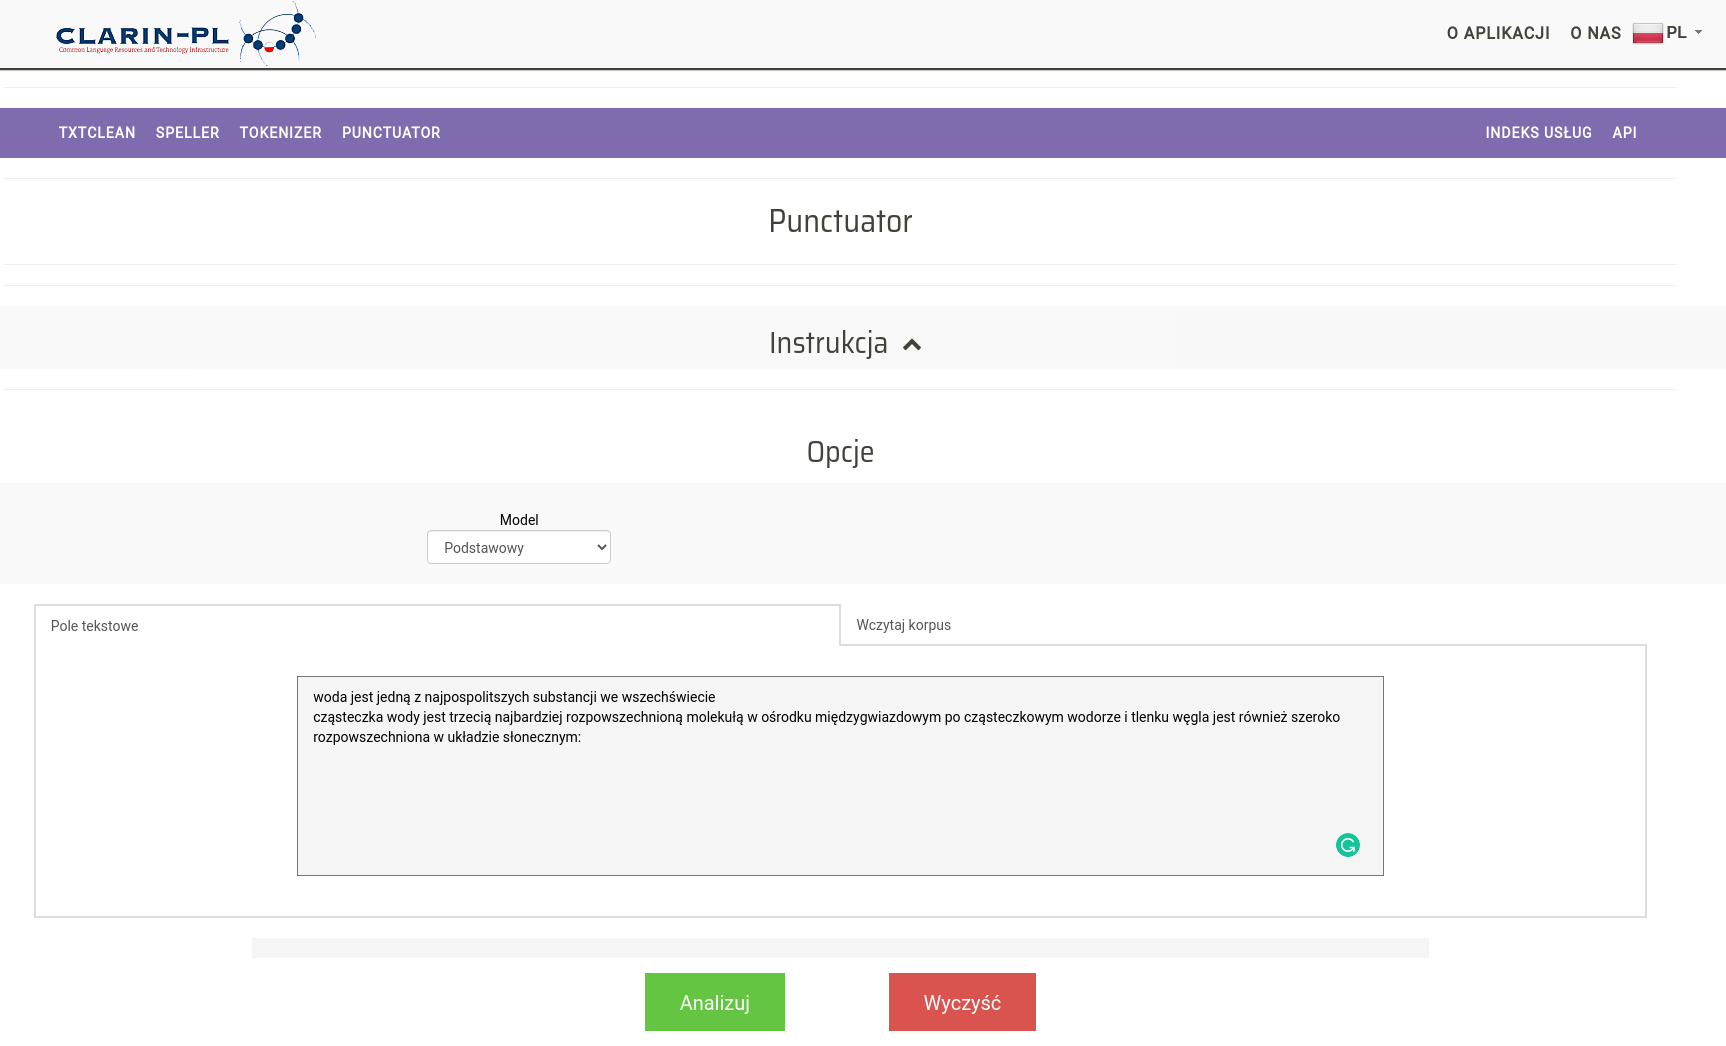

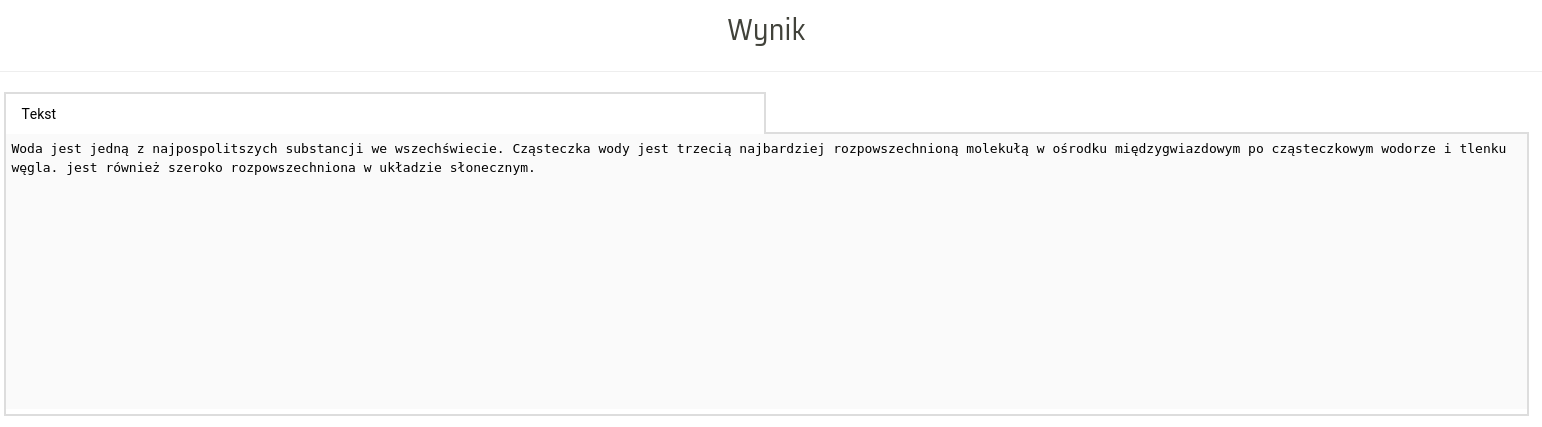

Wejście:

```
woda jest jedną z najpospolitszych substancji we wszechświecie
cząsteczka wody jest trzecią najbardziej rozpowszechnioną molekułą 
w ośrodku międzygwiazdowym po cząsteczkowym wodorze i tlenku węgla 
jest również szeroko rozpowszechniona w układzie słonecznym: 
```

Wyjście:

```
Woda jest jedną z najpospolitszych substancji we wszechświecie. 
Cząsteczka wody jest trzecią najbardziej rozpowszechnioną molekułą 
w ośrodku międzygwiazdowym po cząsteczkowym wodorze i tlenku węgla.
jest również szeroko rozpowszechniona w układzie słonecznym.
```

## Podsumowanie



1.   Podział tekstu na zdania w spaCy realizowany jest przez moduł **parser**.
2.   Generyczny moduł do podziału tekstu na zdania dostępny w spaCy dzieli tekst po wszystkich znakach interpunkcyjnych (.!?).
3.   Modele dedykowane dla j. polskiego radzą sobie lepiej niż model generyczny, ponieważ są w stanie rozróżnić, czy kropka jest częścią skrótu, czy też końcem zdania.
4.   **Duży model** radzi sobie lepiej niż mały model (przykład z `inż.`).
5.   spaCy nie poradzi sobie z wydzieleniem zdań dla tekstu pozbawionego znaków interpunkcyjnych. Chcąc przetwarzać tego typu teksty konieczne jest wcześniejsze jego przetworzenie i próba odtworzenia znaków interpunkcyjnych, np. usługa **punctuator** z CLARIN-PL.